In [3]:
!pip install opendatasets
import opendatasets as od
od.download("https://www.kaggle.com/datasets/hijest/genre-classification-dataset-imdb/code")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: tishavarma
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/hijest/genre-classification-dataset-imdb


100%|██████████| 41.7M/41.7M [00:00<00:00, 75.9MB/s]


In [4]:
import pandas as pd
df = pd.read_csv('/content/genre-classification-dataset-imdb/Genre Classification Dataset/train_data.txt', delimiter=':::',  header=None, names=['ID', 'Title', 'Genre', 'Description'])
print(df.head())

<ipython-input-4-90daf0e3e72c>:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv('/content/genre-classification-dataset-imdb/Genre Classification Dataset/train_data.txt', delimiter=':::',  header=None, names=['ID', 'Title', 'Genre', 'Description'])


   ID                               Title       Genre  \
0   1       Oscar et la dame rose (2009)       drama    
1   2                       Cupid (1997)    thriller    
2   3   Young, Wild and Wonderful (1980)       adult    
3   4              The Secret Sin (1915)       drama    
4   5             The Unrecovered (2007)       drama    

                                         Description  
0   Listening in to a conversation between his do...  
1   A brother and sister with a past incestuous r...  
2   As the bus empties the students for their fie...  
3   To help their unemployed father make ends mee...  
4   The film's title refers not only to the un-re...  


Remove Year from the Title column

In [5]:
df['Year'] = df['Title'].str.extract(r'\((\d{4})\)', expand=False)

df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

df['Title'] = df['Title'].str.replace(r'\s*\(\d{4}\)', '', regex=True)

print(df.head())


   ID                        Title       Genre  \
0   1       Oscar et la dame rose       drama    
1   2                       Cupid    thriller    
2   3   Young, Wild and Wonderful       adult    
3   4              The Secret Sin       drama    
4   5             The Unrecovered       drama    

                                         Description    Year  
0   Listening in to a conversation between his do...  2009.0  
1   A brother and sister with a past incestuous r...  1997.0  
2   As the bus empties the students for their fie...  1980.0  
3   To help their unemployed father make ends mee...  1915.0  
4   The film's title refers not only to the un-re...  2007.0  


In [6]:
print(df.isnull().sum())

ID                0
Title             0
Genre             0
Description       0
Year           4347
dtype: int64


In [7]:
print(df.describe())

                 ID          Year
count  54214.000000  49867.000000
mean   27107.500000   1998.766800
std    15650.378084     22.914058
min        1.000000   1894.000000
25%    13554.250000   1995.000000
50%    27107.500000   2008.000000
75%    40660.750000   2013.000000
max    54214.000000   2022.000000


In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           54214 non-null  int64  
 1   Title        54214 non-null  object 
 2   Genre        54214 non-null  object 
 3   Description  54214 non-null  object 
 4   Year         49867 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 2.1+ MB
None


In [9]:
unique_genres = df['Genre'].nunique()
print(f"Number of unique genres: {unique_genres}")
print(df['Genre'].unique())

Number of unique genres: 27
[' drama ' ' thriller ' ' adult ' ' documentary ' ' comedy ' ' crime '
 ' reality-tv ' ' horror ' ' sport ' ' animation ' ' action ' ' fantasy '
 ' short ' ' sci-fi ' ' music ' ' adventure ' ' talk-show ' ' western '
 ' family ' ' mystery ' ' history ' ' news ' ' biography ' ' romance '
 ' game-show ' ' musical ' ' war ']


In [10]:
df['Genre'] = df['Genre'].str.strip()
print(df['Genre'].unique())

['drama' 'thriller' 'adult' 'documentary' 'comedy' 'crime' 'reality-tv'
 'horror' 'sport' 'animation' 'action' 'fantasy' 'short' 'sci-fi' 'music'
 'adventure' 'talk-show' 'western' 'family' 'mystery' 'history' 'news'
 'biography' 'romance' 'game-show' 'musical' 'war']


In [11]:
genre_counts = df['Genre'].value_counts()
print(genre_counts)

Genre
drama          13613
documentary    13096
comedy          7447
short           5073
horror          2204
thriller        1591
action          1315
western         1032
reality-tv       884
family           784
adventure        775
music            731
romance          672
sci-fi           647
adult            590
crime            505
animation        498
sport            432
talk-show        391
fantasy          323
mystery          319
musical          277
biography        265
history          243
game-show        194
news             181
war              132
Name: count, dtype: int64


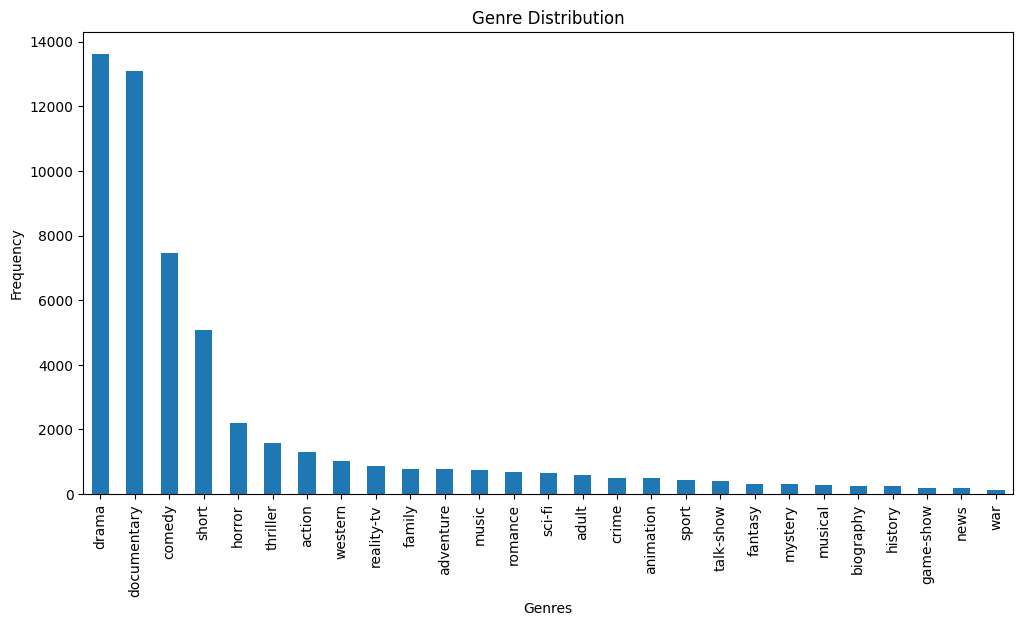

In [12]:
import matplotlib.pyplot as plt
genre_counts.plot(kind='bar', figsize=(12, 6), title='Genre Distribution')
plt.xlabel('Genres')
plt.ylabel('Frequency')
plt.show()

In [13]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer

In [14]:
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    words = text.split()
    words = [word for word in words if word not in stop_words]
    words = [lemmatizer.lemmatize(word) for word in words]
    text = ' '.join(words)
    return text

df['Description'] = df['Description'].apply(preprocess_text)

print(df['Description'].head())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


0    listening conversation doctor parent yearold o...
1    brother sister past incestuous relationship cu...
2    bus empty student field trip museum natural hi...
3    help unemployed father make end meet edith twi...
4    film title refers unrecovered body ground zero...
Name: Description, dtype: object


In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['Description'])
print(X.shape)

(54214, 5000)


In [17]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y = encoder.fit_transform(df['Genre'])
print(encoder.classes_)

['action' 'adult' 'adventure' 'animation' 'biography' 'comedy' 'crime'
 'documentary' 'drama' 'family' 'fantasy' 'game-show' 'history' 'horror'
 'music' 'musical' 'mystery' 'news' 'reality-tv' 'romance' 'sci-fi'
 'short' 'sport' 'talk-show' 'thriller' 'war' 'western']


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [19]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (43371, 5000)
Testing set shape: (10843, 5000)


Logistic Regression model

In [20]:

model = LogisticRegression(max_iter=1000, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(y_pred)


[ 8  8  7 ...  8 21 13]


In [22]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.58


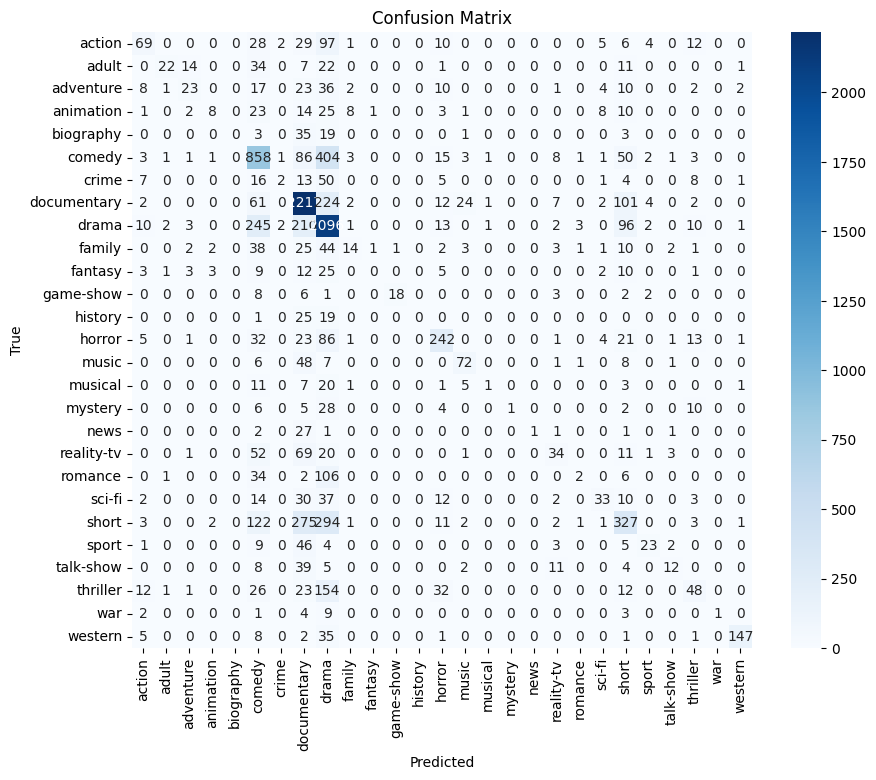

              precision    recall  f1-score   support

      action       0.52      0.26      0.35       263
       adult       0.76      0.20      0.31       112
   adventure       0.45      0.17      0.24       139
   animation       0.50      0.08      0.13       104
   biography       0.00      0.00      0.00        61
      comedy       0.51      0.59      0.55      1443
       crime       0.29      0.02      0.04       107
 documentary       0.67      0.83      0.74      2659
       drama       0.54      0.78      0.64      2697
      family       0.41      0.09      0.15       150
     fantasy       0.00      0.00      0.00        74
   game-show       0.95      0.45      0.61        40
     history       0.00      0.00      0.00        45
      horror       0.64      0.56      0.60       431
       music       0.63      0.50      0.56       144
     musical       0.25      0.02      0.04        50
     mystery       1.00      0.02      0.04        56
        news       1.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(y_test, y_pred, target_names=encoder.classes_))